In [308]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [309]:
train_df = pd.read_csv('data/train.csv')
train_df = train_df.drop('PassengerId',axis=1)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [310]:
def prepare_missing_summary(some_df):
    count_of_null = some_df.isnull().sum().sort_values(ascending=False)
    percentage_of_null = (some_df.isnull().sum()/some_df.isnull().count()).sort_values(ascending=False)
    return pd.concat([count_of_null,percentage_of_null],axis=1,keys=['Total','Percentage'])

prepare_missing_summary(train_df)

,Total,Percentage
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


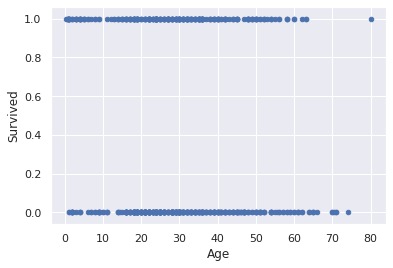

In [311]:
train_df = train_df.drop(['Cabin','Ticket','Name'],axis=1)
train_df = train_df.drop(train_df.loc[train_df['Embarked'].isnull()].index)
trait = 'Age'
pd.concat([train_df['Survived'],train_df[trait]],axis=1).plot.scatter(x=trait,y='Survived')
plt.show()
train_df = train_df.drop([trait],axis=1)

In [312]:
prepare_missing_summary(train_df)

,Total,Percentage
Embarked,0,0.0
Fare,0,0.0
Parch,0,0.0
SibSp,0,0.0
Sex,0,0.0
Pclass,0,0.0
Survived,0,0.0


In [313]:
train_df['Sex'] = train_df['Sex'].astype('category')
train_df['Sex'] = train_df['Sex'].cat.codes

train_df=pd.get_dummies(train_df, columns=['Pclass','SibSp','Parch','Embarked'])

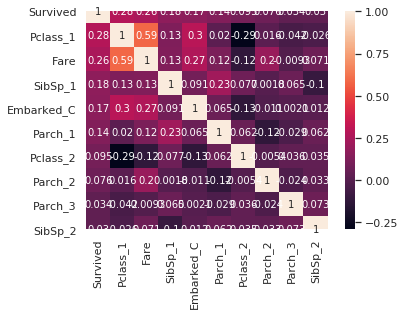

In [314]:
corrmat = train_df.corr()
cols = corrmat.nlargest(10, 'Survived')['Survived'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.heatmap(cm, square=True, annot=True, yticklabels=cols.values, xticklabels=cols.values)
#DELETE FARE

In [329]:
# sns.set()
# sns.pairplot(train_df[train_df.columns])
# plt.show()
train_df.head()

,Sex,Fare,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,1,7.2500,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,71.2833,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,0,7.9250,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,53.1000,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,1,8.0500,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [316]:
from sklearn.model_selection import train_test_split
y=train_df.pop('Survived')
x=train_df

In [341]:
from sklearn.tree import DecisionTreeClassifier
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
clf = DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
clf.score(x_test,y_test)

0.8033707865168539

In [359]:
clf2 = DecisionTreeClassifier()
clf2 = clf.fit(x, y)

In [368]:
test_df = pd.read_csv('data/test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [369]:
prepare_missing_summary(test_df)

,Total,Percentage
Cabin,327,0.782297
Age,86,0.205742
Fare,1,0.002392
Embarked,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


In [372]:
test_df.loc[test_df['Fare'].isnull()]['Fare']=test_df['Fare'].mean()
test_df = test_df.drop(['Cabin','Ticket','Name','Age'],axis=1)
test_df['Sex'] = test_df['Sex'].astype('category')
test_df['Sex'] = test_df['Sex'].cat.codes

test_df=pd.get_dummies(test_df, columns=['Pclass','SibSp','Parch','Embarked'])
test_df = test_df.set_index('PassengerId')
print(test_df['Fare'].mean())
test_df[test_df['Fare'].isnull()]

KeyError: "['Cabin' 'Ticket' 'Name' 'Age'] not found in axis"

In [371]:
prepare_missing_summary(test_df)

,Total,Percentage
Fare,1,0.002392
Embarked_S,0,0.000000
SibSp_5,0,0.000000
Pclass_1,0,0.000000
Pclass_2,0,0.000000
Pclass_3,0,0.000000
SibSp_0,0,0.000000
SibSp_1,0,0.000000
SibSp_2,0,0.000000
SibSp_3,0,0.000000


In [357]:
predictions = clf2.predict(test_df)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').